In [2]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A

[(620.6646274697064, 775.3575415307128, 76.47141386955843, 74.11167563440904), (965.9453028566518, 529.2991107416472, 91.57305777502961, 86.81683858772146), (1248.7526733706613, 166.95212313696828, 70.84218319514821, 67.42064479764718), (382.1798047055884, 568.4459220211261, 69.6079025318133, 72.24754176395754), (681.6037809216959, 292.40543657413946, 90.33877711169487, 91.64373555403193)]
['white and red helicopter', 'blue and yellow fighter jet', 'grey and white fighter plane', 'white fighter jet', 'grey and black fighter plane']


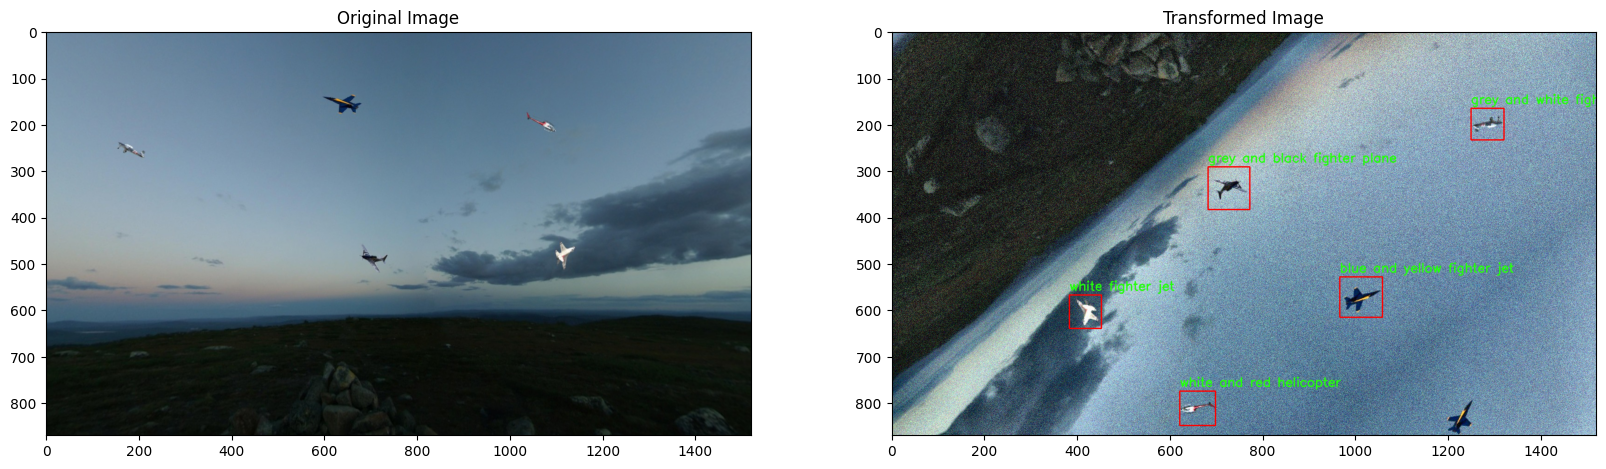

In [24]:
image = cv2.imread("data/images/image_5.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

data = [{"caption": "white and red helicopter", "bbox": [1036, 176, 64, 40]}, {"caption": "blue and yellow fighter jet", "bbox": [596, 136, 84, 40]}, {"caption": "grey and white fighter plane", "bbox": [152, 240, 64, 32]}, {"caption": "white fighter jet", "bbox": [1100, 456, 40, 56]}, {"caption": "grey and black fighter plane", "bbox": [676, 456, 60, 64]}]
captions = [d["caption"] for d in data]
bboxes = [d["bbox"] for d in data]

tranform = A.Compose([
    # A.RandomRain(p=0.1, slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=5, brightness_coefficient=0.9, rain_type=None),
    # A.Rotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(p=1),
    A.RandomBrightnessContrast(p=1),
    # A.HueSaturationValue(p=1),
    A.AdvancedBlur(blur_limit=3, p=0.2),
    A.GaussNoise(p=1, var_limit=(10.0, 300.0), per_channel=True),
    A.CLAHE(p=0.5),
    A.ImageCompression(quality_lower=75, p=0.2),
], bbox_params=A.BboxParams(format='coco', label_fields=['captions'], min_visibility=0.2))

transformed = tranform(image=image, bboxes=bboxes, captions=captions)
transformed_image = transformed["image"]
transformed_bboxes = transformed["bboxes"]
transformed_captions = transformed["captions"]

print(transformed_bboxes)
print(transformed_captions)

for bbox, caption in zip(transformed_bboxes, transformed_captions):
    x, y, w, h = bbox
    x1, y1, x2, y2 = int(x), int(y), int(x+w), int(y+h)
    cv2.rectangle(transformed_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(transformed_image, caption, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
# show both images side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image)
ax[1].set_title("Transformed Image")
plt.show()

